In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

import scipy as sci
import wave
from scipy.io.wavfile import read as read_wav

from sklearn.model_selection import train_test_split

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [3]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [4]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [5]:
df['label'].value_counts()

label
fear       400
angry      400
disgust    400
neutral    400
sad        400
ps         400
happy      400
Name: count, dtype: int64

In [6]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

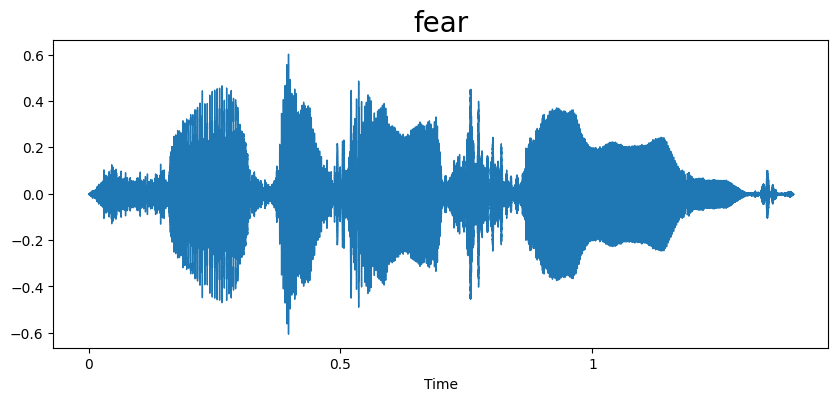

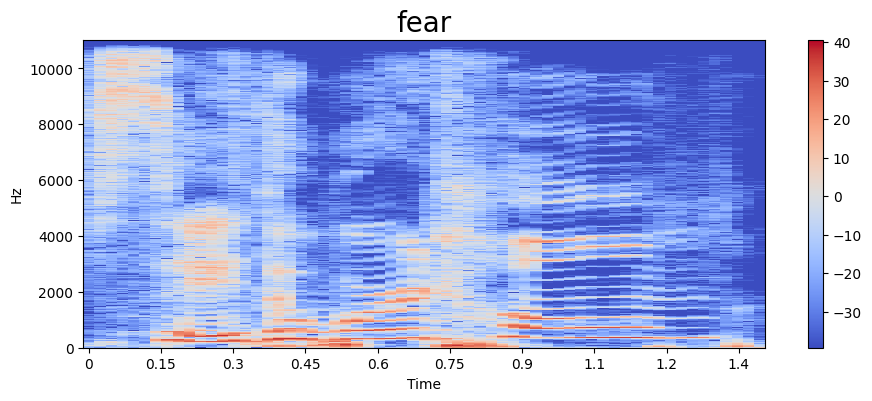

In [7]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

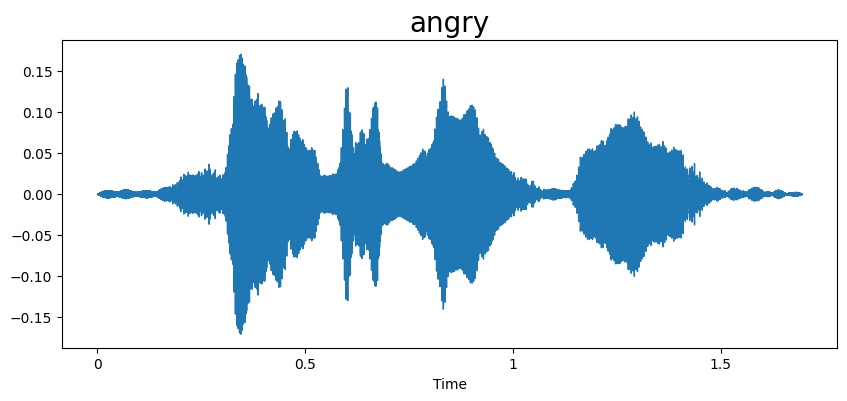

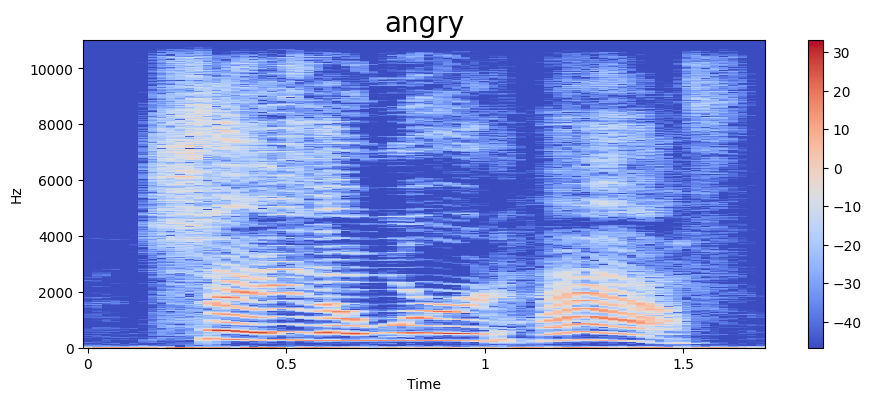

In [8]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

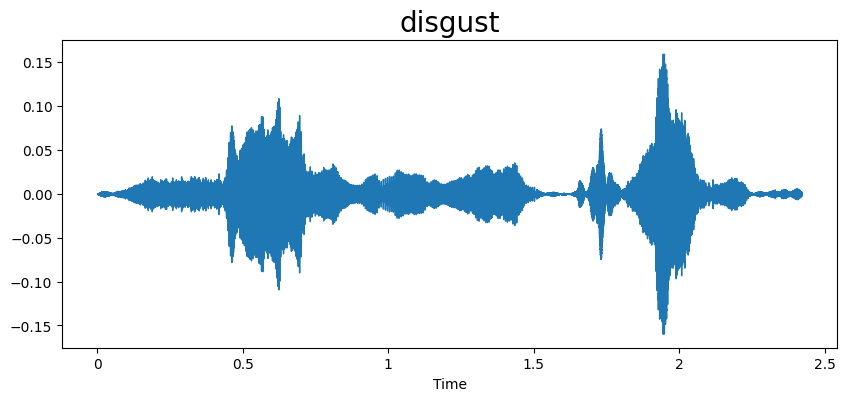

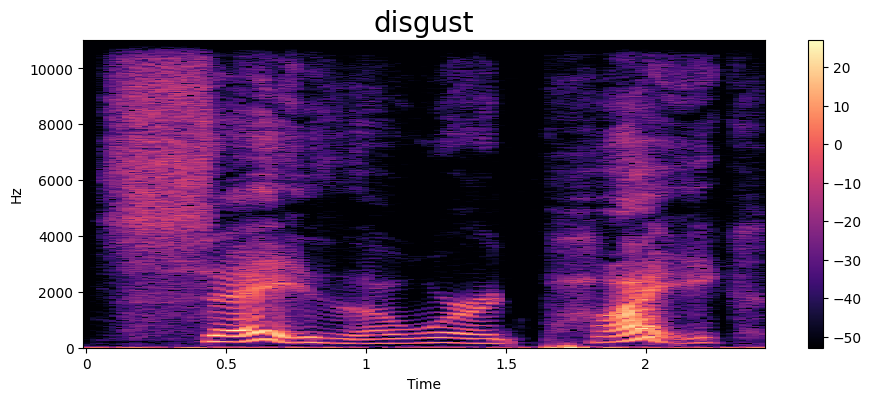

In [9]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[2]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

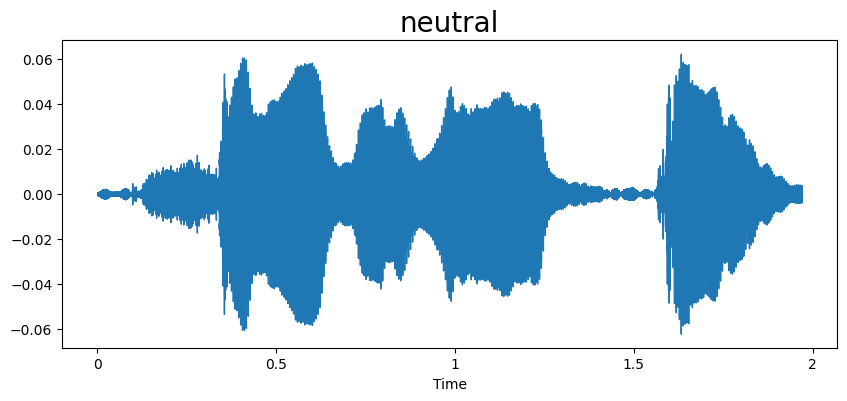

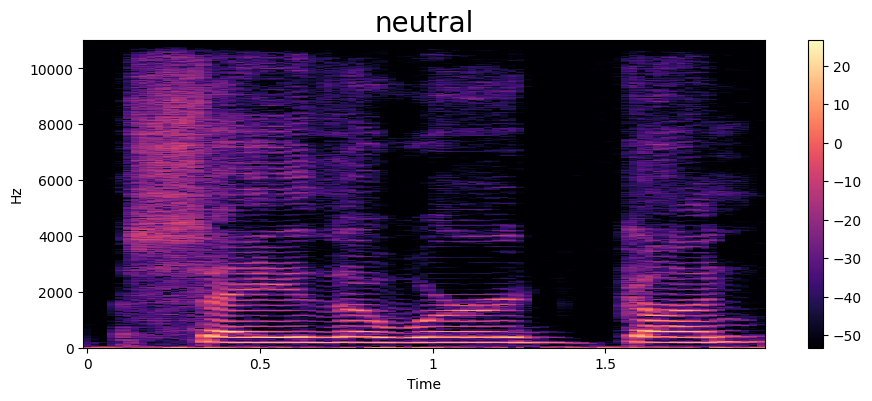

In [10]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[3]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

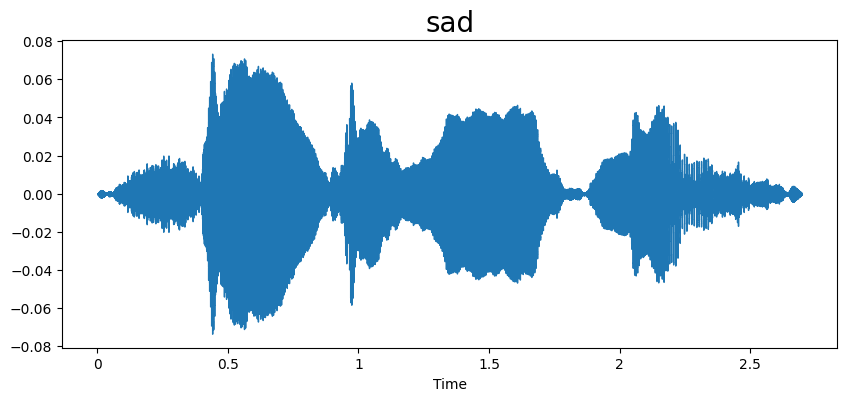

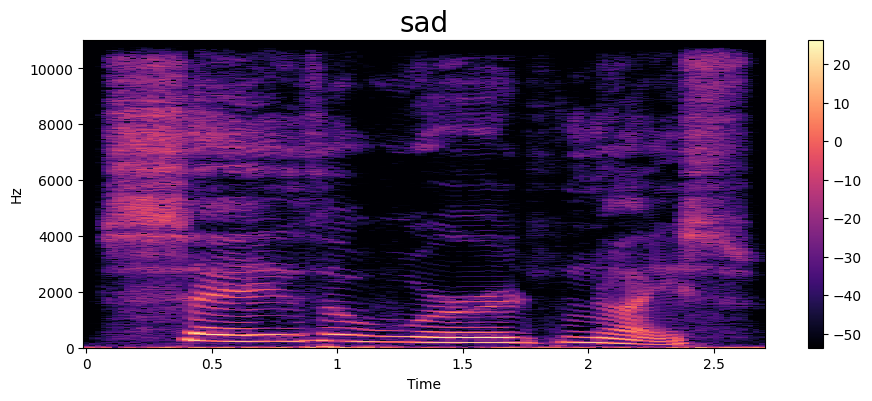

In [11]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[4]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

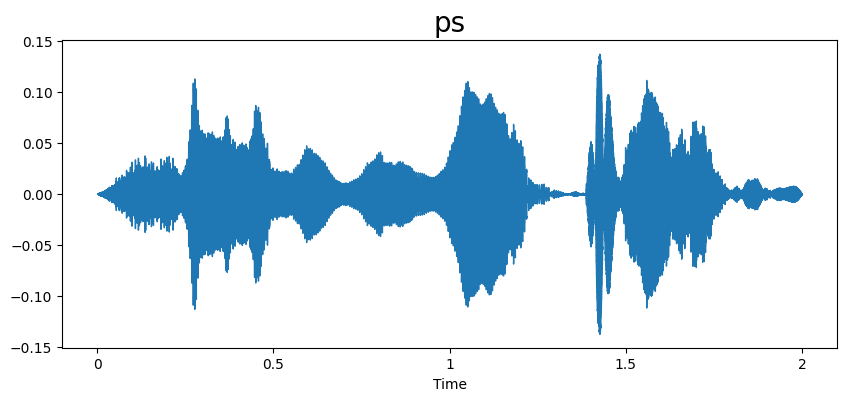

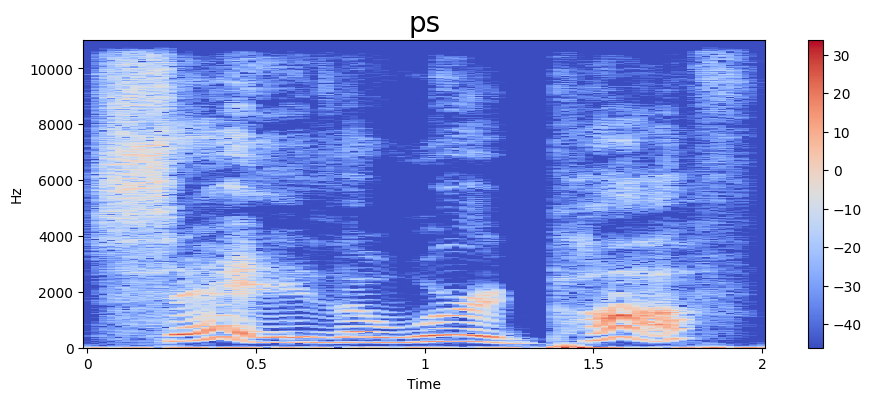

In [12]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[5]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

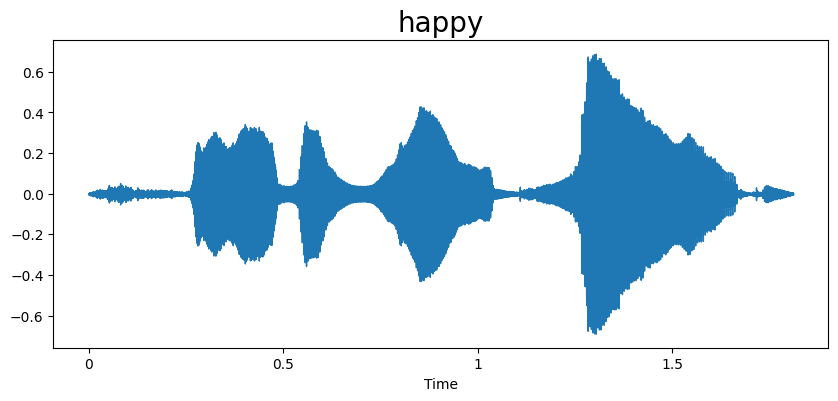

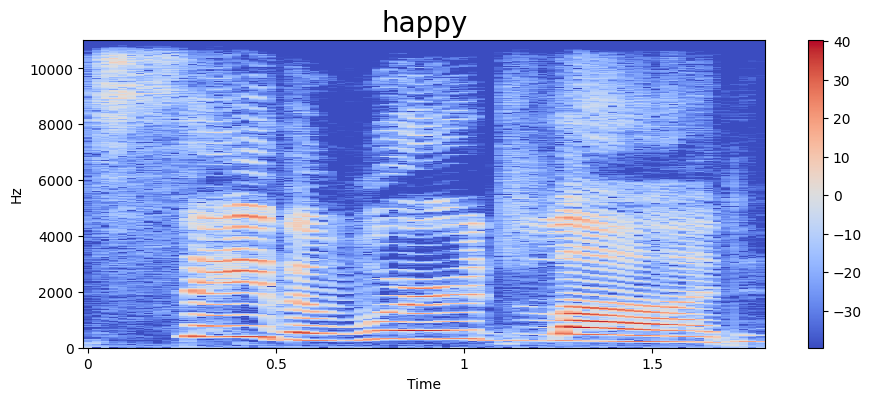

In [13]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[6]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [14]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [15]:
extract_mfcc(df['speech'][0])

array([-285.7373    ,   85.78295   ,   -2.1689105 ,   22.125532  ,
        -14.757396  ,   11.051346  ,   12.412452  ,   -3.0002632 ,
          1.0844971 ,   11.078272  ,  -17.419662  ,   -8.093215  ,
          6.5879736 ,   -4.220953  ,   -9.15508   ,    3.521479  ,
        -13.186381  ,   14.078853  ,   19.669733  ,   22.725618  ,
         32.574642  ,   16.325031  ,   -3.8427277 ,    0.89629626,
        -11.239262  ,    6.653462  ,   -2.5883691 ,   -7.7140174 ,
        -10.941658  ,   -2.4007556 ,   -5.2812862 ,    4.2711563 ,
        -11.202216  ,   -9.024621  ,   -3.6669848 ,    4.8697433 ,
         -1.6027985 ,    2.5600505 ,   11.454375  ,   11.23345   ],
      dtype=float32)

In [16]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [17]:
X_mfcc

0       [-285.7373, 85.78295, -2.1689105, 22.125532, -...
1       [-348.34332, 35.193233, -3.8413274, 14.658875,...
2       [-340.11435, 53.796444, -14.267782, 20.884031,...
3       [-306.6343, 21.25971, -4.4110823, 6.4871554, -...
4       [-344.7548, 46.329193, -24.171415, 19.392921, ...
                              ...                        
2795    [-374.39523, 60.865, 0.025058376, 8.431059, -2...
2796    [-313.9648, 39.847843, -5.6493053, -3.8675752,...
2797    [-357.54886, 77.88606, -15.224756, 2.1946328, ...
2798    [-353.14743, 101.68391, -14.175895, -12.037377...
2799    [-389.4595, 54.042767, 1.3469967, -1.4258995, ...
Name: speech, Length: 2800, dtype: object

In [18]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [19]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [20]:
y = y.toarray()

In [21]:
y.shape

(2800, 7)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

2025-10-19 04:17:03.187151: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-19 04:17:03.187215: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-19 04:17:03.189085: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


I0000 00:00:1760847430.430038     543 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


62/62 [==============================] - 5s 17ms/step - loss: 1.0846 - accuracy: 0.5837 - val_loss: 0.3658 - val_accuracy: 0.8762
Epoch 2/10
62/62 [==============================] - 0s 8ms/step - loss: 0.3732 - accuracy: 0.8689 - val_loss: 0.1813 - val_accuracy: 0.9464
Epoch 3/10
62/62 [==============================] - 0s 7ms/step - loss: 0.2407 - accuracy: 0.9291 - val_loss: 0.1606 - val_accuracy: 0.9536
Epoch 4/10
62/62 [==============================] - 0s 7ms/step - loss: 0.1756 - accuracy: 0.9490 - val_loss: 0.2633 - val_accuracy: 0.9250
Epoch 5/10
62/62 [==============================] - 0s 7ms/step - loss: 0.2008 - accuracy: 0.9439 - val_loss: 0.0838 - val_accuracy: 0.9738
Epoch 6/10
62/62 [==============================] - 0s 7ms/step - loss: 0.1486 - accuracy: 0.9587 - val_loss: 0.1117 - val_accuracy: 0.9607
Epoch 7/10
62/62 [==============================] - 0s 8ms/step - loss: 0.1297 - accuracy: 0.9577 - val_loss: 0.1086 - val_accuracy: 0.9679
Epoch 8/10
62/62 [============

In [24]:
y_pred = np.argmax(model.predict(x_test), axis=1)
model.evaluate(x_test, y_test)

27/27 [==============================] - 0s 3ms/step - loss: 0.0994 - accuracy: 0.9714


[0.09941361099481583, 0.9714285731315613]

In [25]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = np.argmax(model.predict(x_test), axis=1)

27/27 [==============================] - 0s 2ms/step


In [26]:
import numpy as np
import librosa
from tensorflow.keras.preprocessing.sequence import pad_sequences

def extract_mfcc_seq(filename, n_mfcc=40, sr=22050, duration=3, offset=0.5):
    try:
        y, sr = librosa.load(filename, sr=sr, duration=duration, offset=offset)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        return mfcc.T
    except:
        return np.zeros((1, n_mfcc))

seqs = [extract_mfcc_seq(p) for p in df['speech'].values]
max_len = max(s.shape[0] for s in seqs)
print("Max timesteps:", max_len)

padded = pad_sequences([s for s in seqs], maxlen=max_len, dtype='float32', padding='post', truncating='post')
X = np.array(padded)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

model = Sequential([
    Bidirectional(LSTM(128, return_sequences=False), input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y.shape[1], activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Max timesteps: 108
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 256)               173056    
 al)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                16448     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 7)                 455       
                                                                 
Total params: 189959 (742.03 KB)
Trainable params: 189959 (742.03 KB)
Non-trainable params: 0 (0.00 B

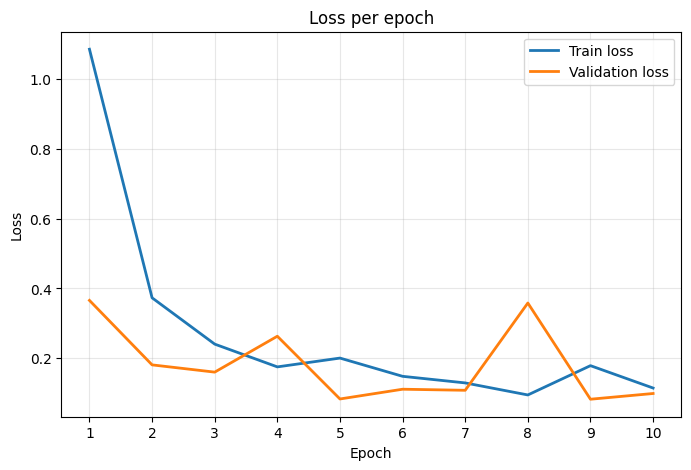

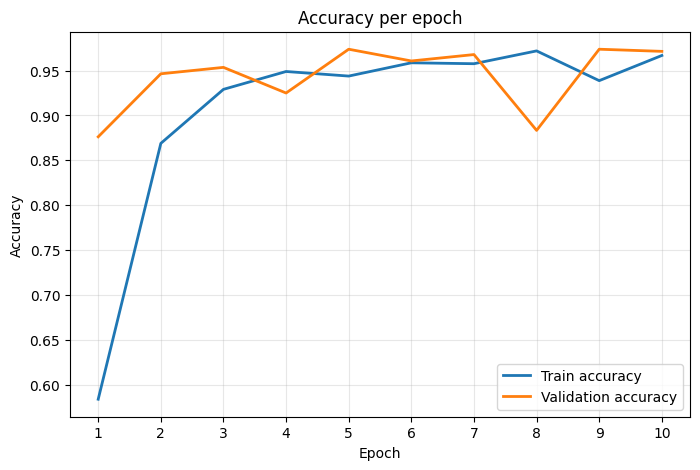

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series

h = history

loss = h.history.get('loss', [])
val_loss = h.history.get('val_loss', None)

epochs = np.arange(1, len(loss) + 1)

plt.figure(figsize=(8,5))
plt.plot(epochs, loss, label='Train loss', linewidth=2)
if val_loss is not None:
    plt.plot(epochs, val_loss, label='Validation loss', linewidth=2)
plt.title('Loss per epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
step = max(1, len(epochs)//10)
plt.xticks(epochs[::step])
plt.legend()
plt.grid(alpha=0.3)
plt.show()

acc = h.history.get('accuracy') or h.history.get('acc')
val_acc = h.history.get('val_accuracy') or h.history.get('val_acc')

if acc is not None:
    plt.figure(figsize=(8,5))
    plt.plot(epochs, acc, label='Train accuracy', linewidth=2)
    if val_acc is not None:
        plt.plot(epochs, val_acc, label='Validation accuracy', linewidth=2)
    plt.title('Accuracy per epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    step = max(1, len(epochs)//10)
    plt.xticks(epochs[::step])
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
else:
    print("No accuracy found in history (keys:", list(h.history.keys()), ").")

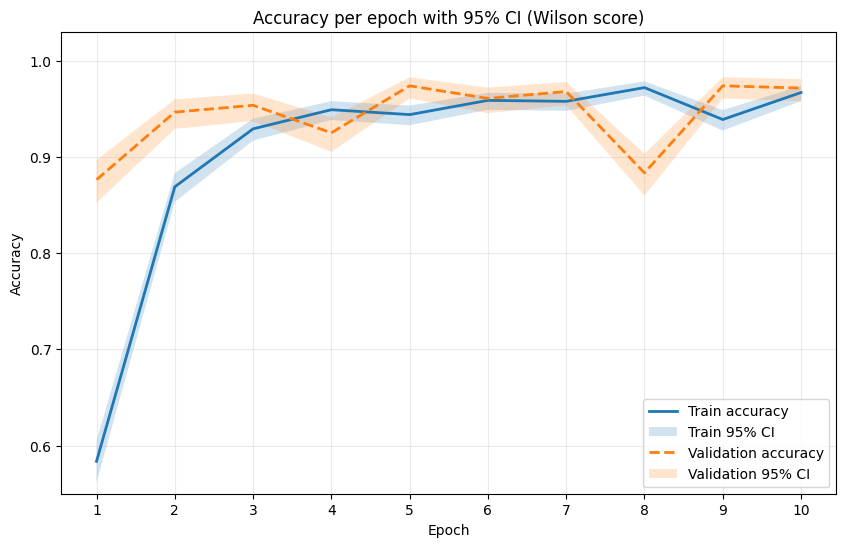

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def wilson_interval(p_array, n, z=1.96):
    """
    p_array : array-like of proportions (0..1)
    n       : number of samples (int)
    returns : (lower_array, upper_array)
    """
    p = np.asarray(p_array, dtype=float)
    if n is None or n <= 0:
        raise ValueError("n (number of samples) must be a positive integer for CI calculation.")
    z2 = z**2
    denom = 1 + z2 / n
    center = (p + z2 / (2*n)) / denom
    margin = (z * np.sqrt((p*(1-p) / n) + (z2 / (4 * n**2)))) / denom
    lower = center - margin
    upper = center + margin
    lower = np.clip(lower, 0.0, 1.0)
    upper = np.clip(upper, 0.0, 1.0)
    return lower, upper

h = getattr(history, 'history', history)
acc = h.get('accuracy') or h.get('acc')
val_acc = h.get('val_accuracy') or h.get('val_acc')

if acc is None:
    raise KeyError(f"No accuracy found in history. Available keys: {list(h.keys())}")

epochs = np.arange(1, len(acc) + 1)

n_train = None
n_val = None
try:
    if 'y_train' in globals():
        n_train = int(np.asarray(y_train).shape[0])
    if 'y_test' in globals():
        n_val = int(np.asarray(y_test).shape[0])
except Exception:
    n_train = None
    n_val = None

if (n_train is None or n_train <= 0) and 'x_train' in globals():
    try:
        n_train = int(np.asarray(x_train).shape[0])
    except Exception:
        pass
if (n_val is None or n_val <= 0) and 'x_test' in globals():
    try:
        n_val = int(np.asarray(x_test).shape[0])
    except Exception:
        pass

if n_train is None or n_val is None:
    raise RuntimeError("Could not infer n_train and/or n_val from y_train/y_test or x_train/x_test. "
                       "These are required to compute 95% CI. Make sure y_train/y_test exist.")

train_lower, train_upper = wilson_interval(acc, n_train)

if val_acc is not None:
    minlen = min(len(acc), len(val_acc))
    val_acc_trim = np.asarray(val_acc[:minlen])
    val_epochs = epochs[:minlen]
    val_lower, val_upper = wilson_interval(val_acc_trim, n_val)
else:
    val_epochs = None

plt.figure(figsize=(10,6))
plt.plot(epochs, acc, label='Train accuracy', linewidth=2)
plt.fill_between(epochs, train_lower, train_upper, alpha=0.2, label='Train 95% CI')

if val_acc is not None:
    plt.plot(val_epochs, val_acc_trim, label='Validation accuracy', linewidth=2, linestyle='--')
    plt.fill_between(val_epochs, val_lower, val_upper, alpha=0.2, label='Validation 95% CI')

plt.title('Accuracy per epoch with 95% CI (Wilson score)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.55, 1.03)
step = max(1, len(epochs)//10)
plt.xticks(epochs[::step])
plt.grid(alpha=0.25)
plt.legend()
plt.show()

Max timesteps (capped): 108
X shape: (2800, 108, 40)
Classes: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'ps' 'sad']
Train shape: (1960, 108, 40) Val shape: (840, 108, 40)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 108, 40)]            0         []                            
                                                                                                  
 dense_14 (Dense)            (None, 108, 128)             5248      ['input_2[0][0]']             
                                                                                                  
 positional_encoding_1 (Pos  (None, 108, 128)             0         ['dense_14[0][0]']            
 itionalEncoding)                                                                                 
                  

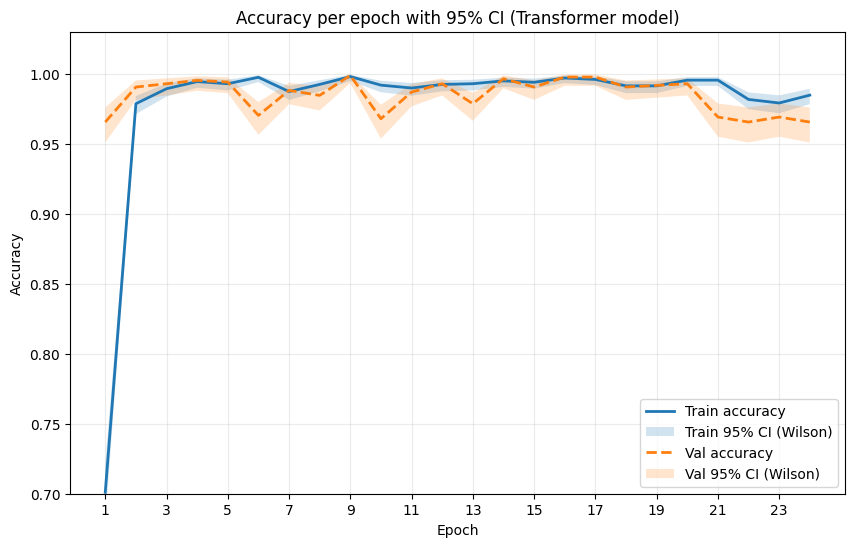

In [33]:
import os
import numpy as np
import pandas as pd
import librosa
from tensorflow.keras import layers, models, callbacks, utils, backend as K
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, GlobalAveragePooling1D
from tensorflow.keras.layers import MultiHeadAttention
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

DATA_DIR = '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data'
n_mfcc = 40
duration = 3.0
offset = 0.5
sr = 22050
max_timesteps_cap = 130
batch_size = 32
epochs = 50
random_state = 42

if 'df' not in globals():
    paths = []
    labels = []
    for dirname, _, filenames in os.walk(DATA_DIR):
        for filename in filenames:
            if filename.lower().endswith('.wav'):
                paths.append(os.path.join(dirname, filename))
                lbl = filename.split('_')[-1].split('.')[0].lower()
                labels.append(lbl)
        if len(paths) >= 2800:
            break
    df = pd.DataFrame({'speech': paths, 'label': labels})
    print("Built df with", len(df), "samples and labels:", sorted(df['label'].unique()))

def extract_mfcc_seq(path, n_mfcc=n_mfcc, sr=sr, duration=duration, offset=offset):
    try:
        y, sr = librosa.load(path, sr=sr, duration=duration, offset=offset)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        return mfcc.T
    except Exception as e:
        print("Error loading", path, e)
        return np.zeros((1, n_mfcc), dtype=np.float32)

seqs = [extract_mfcc_seq(p) for p in df['speech'].values]
timesteps = [s.shape[0] for s in seqs]
max_len = int(min(max(timesteps), max_timesteps_cap))
print("Max timesteps (capped):", max_len)

from tensorflow.keras.preprocessing.sequence import pad_sequences
padded = pad_sequences(seqs, maxlen=max_len, dtype='float32', padding='post', truncating='post')

X = np.array(padded)
print("X shape:", X.shape)

n_samples = X.shape[0]
X_2d = X.reshape(-1, n_mfcc)
scaler = StandardScaler()
X_2d_scaled = scaler.fit_transform(X_2d)
X = X_2d_scaled.reshape(n_samples, max_len, n_mfcc)

le = LabelEncoder()
y_int = le.fit_transform(df['label'].values)
y = utils.to_categorical(y_int)
n_classes = y.shape[1]
print("Classes:", le.classes_)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state, stratify=y_int)
print("Train shape:", x_train.shape, "Val shape:", x_test.shape)

import tensorflow as tf
class PositionalEncoding(layers.Layer):
    def __init__(self, maxlen, d_model):
        super().__init__()
        self.maxlen = maxlen
        self.d_model = d_model
        # build once
        pos = np.arange(maxlen)[:, np.newaxis]
        i = np.arange(d_model)[np.newaxis, :]
        angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
        angle_rads = pos * angle_rates
        angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
        angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
        self.pos_encoding = tf.cast(angle_rads[np.newaxis, ...], dtype=tf.float32)

    def call(self, x):
        length = tf.shape(x)[1]
        return x + self.pos_encoding[:, :length, :]

def transformer_encoder_block(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    attn_output = Dropout(dropout)(attn_output)
    out1 = LayerNormalization(epsilon=1e-6)(inputs + attn_output)
    ffn = Dense(ff_dim, activation='relu')(out1)
    ffn = Dense(inputs.shape[-1])(ffn)
    ffn = Dropout(dropout)(ffn)
    return LayerNormalization(epsilon=1e-6)(out1 + ffn)

def build_transformer_classifier(
    input_shape,
    num_classes,
    num_blocks=3,
    head_size=64,
    num_heads=4,
    ff_dim=128,
    dropout=0.2
):
    inputs = Input(shape=input_shape)
    d_model = head_size * num_heads
    x = Dense(d_model)(inputs)
    x = PositionalEncoding(input_shape[0], d_model)(x)

    for _ in range(num_blocks):
        x = transformer_encoder_block(x, head_size=head_size, num_heads=num_heads, ff_dim=ff_dim, dropout=dropout)

    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

input_shape = (max_len, n_mfcc)
model = build_transformer_classifier(input_shape, n_classes,
                                     num_blocks=3,
                                     head_size=32,
                                     num_heads=4,
                                     ff_dim=128,
                                     dropout=0.2)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

es = callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
mc = callbacks.ModelCheckpoint('best_transformer.h5', monitor='val_loss', save_best_only=True)

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[es, mc])

eval_loss, eval_acc = model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", eval_loss, "Test acc:", eval_acc)

def wilson_interval(p_array, n, z=1.96):
    p = np.asarray(p_array, dtype=float)
    if n is None or n <= 0:
        raise ValueError("n (number of samples) must be positive integer.")
    z2 = z**2
    denom = 1 + z2 / n
    center = (p + z2 / (2*n)) / denom
    margin = (z * np.sqrt((p*(1-p) / n) + (z2 / (4 * n**2)))) / denom
    lower = center - margin
    upper = center + margin
    return np.clip(lower, 0, 1), np.clip(upper, 0, 1)

h = history.history
acc = h.get('accuracy') or h.get('acc')
val_acc = h.get('val_accuracy') or h.get('val_acc')
if acc is None:
    raise KeyError("No accuracy found in history keys: " + str(list(h.keys())))

epochs_idx = np.arange(1, len(acc) + 1)

n_train = x_train.shape[0]
n_val = x_test.shape[0]

train_lower, train_upper = wilson_interval(acc, n_train)

if val_acc is not None:
    minlen = min(len(acc), len(val_acc))
    val_acc_trim = np.asarray(val_acc[:minlen])
    val_lower, val_upper = wilson_interval(val_acc_trim, n_val)
    val_epochs = epochs_idx[:minlen]
else:
    val_epochs = None

plt.figure(figsize=(10,6))
plt.plot(epochs_idx, acc, label='Train accuracy', linewidth=2)
plt.fill_between(epochs_idx, train_lower, train_upper, alpha=0.2, label='Train 95% CI (Wilson)')

if val_acc is not None:
    plt.plot(val_epochs, val_acc_trim, '--', label='Val accuracy', linewidth=2)
    plt.fill_between(val_epochs, val_lower, val_upper, alpha=0.2, label='Val 95% CI (Wilson)')

plt.title('Accuracy per epoch with 95% CI (Transformer model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.03)
step = max(1, len(epochs_idx)//10)
plt.xticks(epochs_idx[::step])
plt.grid(alpha=0.25)
plt.legend()
plt.show()